In [33]:
import pandas as pd
from numpy import median
import numpy as np

In [34]:
team_name="RCB"
team_df=pd.read_csv(f"{team_name}.csv")
final_compare_df = pd.DataFrame()
team_df.head()

,Unnamed: 0,p1,p2,r1,r2,lead,follower,larger_score,total_score,performance
0,0,V Kohli,Washington Sundar,19.0,10.0,V Kohli,Washington Sundar,19.0,29.0,0.654947
1,1,V Kohli,RM Patidar,11.5,12.0,RM Patidar,V Kohli,12.0,23.5,0.510421
2,2,V Kohli,GJ Maxwell,30.5,13.0,V Kohli,GJ Maxwell,30.5,43.5,0.700988
3,3,AB de Villiers,GJ Maxwell,4.0,12.0,GJ Maxwell,AB de Villiers,12.0,16.0,0.749532
4,4,AB de Villiers,Shabhaz Ahmed,3.0,7.5,Shabhaz Ahmed,AB de Villiers,7.5,10.5,0.713606


In [35]:
team_df.p1.unique()

array(['V Kohli', 'AB de Villiers', 'DT Christian', 'HV Patel',
       'GJ Maxwell', 'RM Patidar', 'Washington Sundar', 'KA Jamieson',
       'YS Chahal', 'DR Sams', 'KS Bharat', 'Sachin Baby'], dtype=object)

In [36]:
import networkx as nx
team_df1=team_df.copy()
team_df1['lead']=team_df['follower']
team_df1['follower']=team_df['lead']
team_df1.head()
team_df1=pd.concat([team_df,team_df1])


In [37]:
G_UnDirected=nx.from_pandas_edgelist(team_df1, "follower", "lead", ['performance'])

# get edge weights
_, wt1 = zip(*nx.get_edge_attributes(G_UnDirected, 'performance').items())


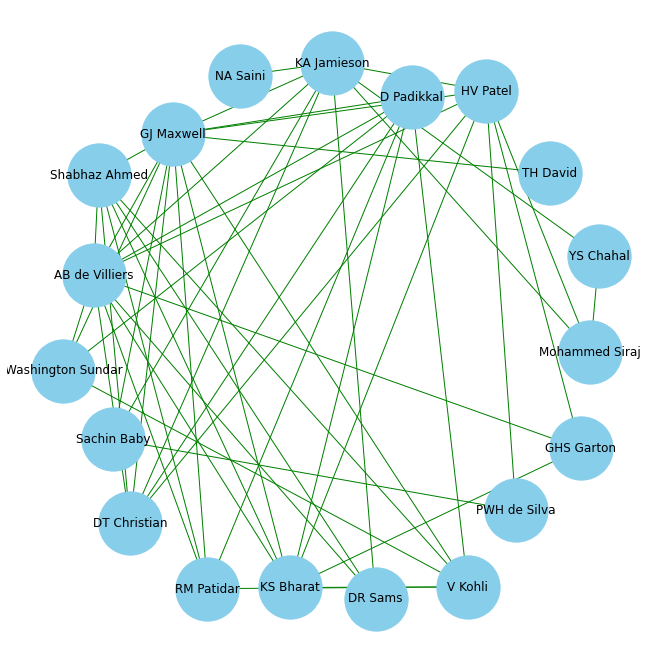

In [38]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_UnDirected, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_UnDirected, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_UnDirected.edges(), edge_color='g')
plt.savefig(f"Graphs/{team_name}/{team_name}_UnDirected.png", format="PNG")
plt.show()

In [39]:
import networkx as nx
# construct graph
G_Directed = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G_Directed, 'performance').items())

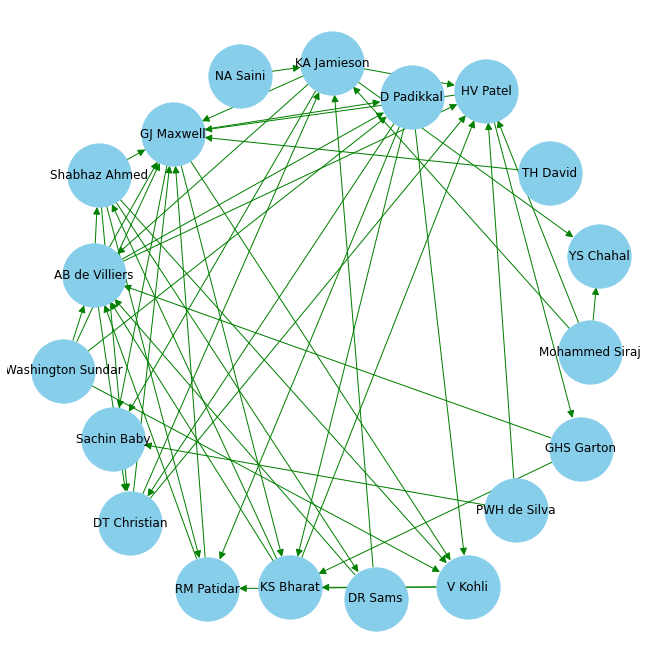

In [40]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_Directed, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_Directed, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_Directed.edges(), edge_color='g', arrowsize=15)
plt.savefig(f"Graphs/{team_name}/{team_name}_Directed.png", format="PNG")
plt.show()

# Degree of each node of graph

In [41]:
print("Degree of above Network:")
print(G_Directed.degree(),"\n")
deg=G_Directed.degree()

Degree of above Network:
[('Washington Sundar', 4), ('V Kohli', 6), ('RM Patidar', 5), ('GJ Maxwell', 12), ('AB de Villiers', 11), ('Shabhaz Ahmed', 7), ('DT Christian', 6), ('KA Jamieson', 9), ('HV Patel', 8), ('Mohammed Siraj', 3), ('D Padikkal', 7), ('NA Saini', 1), ('YS Chahal', 2), ('DR Sams', 3), ('KS Bharat', 7), ('Sachin Baby', 3), ('PWH de Silva', 2), ('TH David', 1), ('GHS Garton', 3)] 



In [42]:
min_name,min_degree=min(deg,key=lambda deg:deg[1])
s=min_name+": "+str(min_degree)
print(s)
final_compare_df['Min_degree_name']=[min_name]
final_compare_df['Min_degree']=[min_degree]

max_name,max_degree=max(deg,key=lambda deg:deg[1])
s=max_name+": "+str(max_degree)
# print(s)
# final_compare_df['Max_Indegree_name']=[s]
print(s)
final_compare_df['Max_degree_name']=[max_name]
final_compare_df['Max_degree']=[max_degree]


NA Saini: 1
GJ Maxwell: 12


# In-degree of each node of the graph

In [43]:
print(G_Directed.in_degree())


[('Washington Sundar', 0), ('V Kohli', 4), ('RM Patidar', 3), ('GJ Maxwell', 8), ('AB de Villiers', 6), ('Shabhaz Ahmed', 2), ('DT Christian', 3), ('KA Jamieson', 4), ('HV Patel', 6), ('Mohammed Siraj', 0), ('D Padikkal', 3), ('NA Saini', 0), ('YS Chahal', 2), ('DR Sams', 1), ('KS Bharat', 4), ('Sachin Baby', 3), ('PWH de Silva', 0), ('TH David', 0), ('GHS Garton', 1)]


In [44]:
indeg=G_Directed.in_degree()
min_name,min_indegree=min(indeg,key=lambda indeg:indeg[1])
s=min_name+": "+str(min_indegree)
# print(s)
final_compare_df['Min_Indegree_name']=[s]

In [45]:

max_name,max_indegree=max(indeg,key=lambda indeg:indeg[1])
s=max_name+": "+str(max_indegree)
# print(s)
final_compare_df['Max_Indegree_name']=[s]



# Out-degree of each node of the graph

In [46]:
print(G_Directed.out_degree())

[('Washington Sundar', 4), ('V Kohli', 2), ('RM Patidar', 2), ('GJ Maxwell', 4), ('AB de Villiers', 5), ('Shabhaz Ahmed', 5), ('DT Christian', 3), ('KA Jamieson', 5), ('HV Patel', 2), ('Mohammed Siraj', 3), ('D Padikkal', 4), ('NA Saini', 1), ('YS Chahal', 0), ('DR Sams', 2), ('KS Bharat', 3), ('Sachin Baby', 0), ('PWH de Silva', 2), ('TH David', 1), ('GHS Garton', 2)]


In [47]:
Out=G_Directed.out_degree()
min_name,min_outdegree=min(Out,key=lambda Out:Out[1])
s=min_name+": "+str(min_outdegree)
# print(s)
final_compare_df['Min_Outdegree_name']=[s]

In [48]:
max_name,max_outdegree=max(Out,key=lambda Out:Out[1])
s=max_name+": "+str(max_outdegree)
# print(s)
final_compare_df['Max_Outdegree_name']=[s]



# Normalized Degree Centrality

In [49]:
print(nx.degree_centrality(G_Directed))

{'Washington Sundar': 0.2222222222222222, 'V Kohli': 0.3333333333333333, 'RM Patidar': 0.2777777777777778, 'GJ Maxwell': 0.6666666666666666, 'AB de Villiers': 0.611111111111111, 'Shabhaz Ahmed': 0.38888888888888884, 'DT Christian': 0.3333333333333333, 'KA Jamieson': 0.5, 'HV Patel': 0.4444444444444444, 'Mohammed Siraj': 0.16666666666666666, 'D Padikkal': 0.38888888888888884, 'NA Saini': 0.05555555555555555, 'YS Chahal': 0.1111111111111111, 'DR Sams': 0.16666666666666666, 'KS Bharat': 0.38888888888888884, 'Sachin Baby': 0.16666666666666666, 'PWH de Silva': 0.1111111111111111, 'TH David': 0.05555555555555555, 'GHS Garton': 0.16666666666666666}


# Closeness Centrality

In [50]:
print(nx.closeness_centrality(G_Directed))

{'Washington Sundar': 0.0, 'V Kohli': 0.43097643097643096, 'RM Patidar': 0.34688346883468835, 'GJ Maxwell': 0.5925925925925926, 'AB de Villiers': 0.5079365079365079, 'Shabhaz Ahmed': 0.3843843843843844, 'DT Christian': 0.3950617283950617, 'KA Jamieson': 0.3386243386243386, 'HV Patel': 0.5267489711934156, 'Mohammed Siraj': 0.0, 'D Padikkal': 0.43097643097643096, 'NA Saini': 0.0, 'YS Chahal': 0.27681992337164746, 'DR Sams': 0.27886710239651413, 'KS Bharat': 0.4444444444444444, 'Sachin Baby': 0.4587301587301587, 'PWH de Silva': 0.0, 'TH David': 0.0, 'GHS Garton': 0.34688346883468835}


# Betweenness Centrality 

In [51]:
print(nx.betweenness_centrality(G_Directed,normalized=True))

{'Washington Sundar': 0.0, 'V Kohli': 0.015250544662309367, 'RM Patidar': 0.01906318082788671, 'GJ Maxwell': 0.17783224400871459, 'AB de Villiers': 0.16666666666666669, 'Shabhaz Ahmed': 0.0792483660130719, 'DT Christian': 0.0849673202614379, 'KA Jamieson': 0.1326252723311547, 'HV Patel': 0.09477124183006536, 'Mohammed Siraj': 0.0, 'D Padikkal': 0.05991285403050109, 'NA Saini': 0.0, 'YS Chahal': 0.0, 'DR Sams': 0.008714596949891067, 'KS Bharat': 0.0857843137254902, 'Sachin Baby': 0.0, 'PWH de Silva': 0.0, 'TH David': 0.0, 'GHS Garton': 0.029411764705882353}


# Reciprocity

In [52]:
print(nx.reciprocity(G_Directed))

0.0


# Density

In [53]:
print(nx.density(G_Directed))



0.14619883040935672


In [54]:
final_compare_df['Density']=[nx.density(G_Directed)]


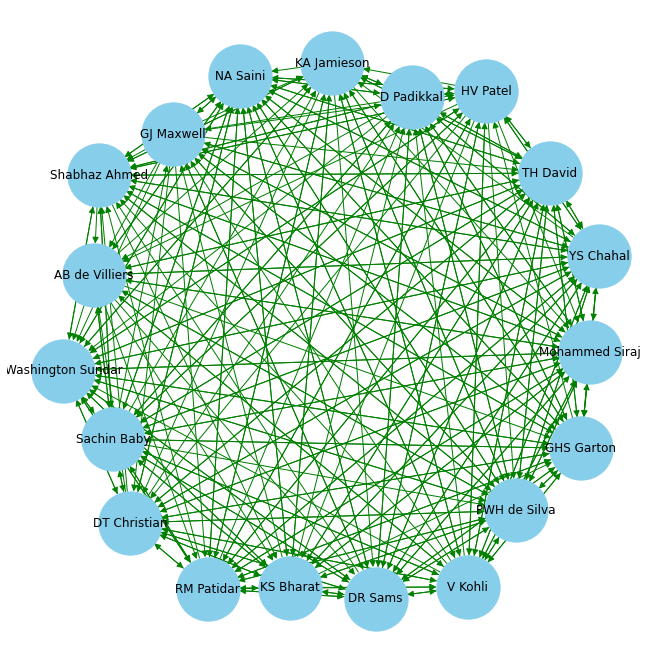

In [55]:
G_C = nx.complement(G_Directed)
# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_C, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_C, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_C.edges(), edge_color='g', arrowsize=13)
plt.savefig(f"Graphs/{team_name}/{team_name}_Complement.png", format="PNG")
plt.show()

# Shortest path lengths between all pairs

In [56]:
shortest_paths=nx.all_pairs_shortest_path_length(G_Directed)
shortest_paths_list=list(shortest_paths)
print(shortest_paths_list)

[('Washington Sundar', {'Washington Sundar': 0, 'V Kohli': 1, 'AB de Villiers': 1, 'GJ Maxwell': 1, 'D Padikkal': 1, 'Sachin Baby': 2, 'Shabhaz Ahmed': 2, 'DT Christian': 2, 'KS Bharat': 2, 'RM Patidar': 2, 'HV Patel': 2, 'GHS Garton': 3, 'DR Sams': 3, 'KA Jamieson': 3, 'YS Chahal': 4}), ('V Kohli', {'V Kohli': 0, 'KS Bharat': 1, 'RM Patidar': 1, 'AB de Villiers': 2, 'GJ Maxwell': 2, 'HV Patel': 2, 'Shabhaz Ahmed': 2, 'Sachin Baby': 3, 'D Padikkal': 3, 'DT Christian': 3, 'GHS Garton': 3, 'DR Sams': 3, 'KA Jamieson': 4, 'YS Chahal': 5}), ('RM Patidar', {'RM Patidar': 0, 'AB de Villiers': 1, 'GJ Maxwell': 1, 'Sachin Baby': 2, 'D Padikkal': 2, 'Shabhaz Ahmed': 2, 'DT Christian': 2, 'KS Bharat': 2, 'V Kohli': 2, 'HV Patel': 2, 'GHS Garton': 3, 'DR Sams': 3, 'KA Jamieson': 3, 'YS Chahal': 4}), ('GJ Maxwell', {'GJ Maxwell': 0, 'V Kohli': 1, 'Sachin Baby': 1, 'KS Bharat': 1, 'D Padikkal': 1, 'Shabhaz Ahmed': 2, 'DT Christian': 2, 'AB de Villiers': 2, 'RM Patidar': 2, 'HV Patel': 2, 'GHS Garto

# Diameter of the Complemented Undirected Network

In [57]:
print(nx.diameter(G_UnDirected))

3


In [58]:
final_compare_df['Diameter']=[nx.diameter(G_UnDirected)]


# Eccentricty of all the nodes of the Undirected Network


In [59]:
dict_ecc=dict(nx.eccentricity(G_UnDirected))
print(dict_ecc)

{'Washington Sundar': 3, 'V Kohli': 3, 'RM Patidar': 3, 'GJ Maxwell': 2, 'AB de Villiers': 2, 'Shabhaz Ahmed': 3, 'DT Christian': 2, 'KA Jamieson': 2, 'HV Patel': 2, 'Mohammed Siraj': 3, 'D Padikkal': 3, 'NA Saini': 3, 'YS Chahal': 3, 'DR Sams': 3, 'KS Bharat': 3, 'Sachin Baby': 3, 'PWH de Silva': 3, 'TH David': 3, 'GHS Garton': 3}


# Implementing the Girvan-Newman Algorithm for Community Detection in Python

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg


# find communities in the graph
c = girvan_newman(G_UnDirected.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

print(node_groups)  #printing the communities in the form of lists

[['Sachin Baby', 'GJ Maxwell', 'YS Chahal', 'D Padikkal', 'Shabhaz Ahmed', 'DT Christian', 'GHS Garton', 'NA Saini', 'AB de Villiers', 'Washington Sundar', 'KS Bharat', 'Mohammed Siraj', 'RM Patidar', 'V Kohli', 'PWH de Silva', 'DR Sams', 'KA Jamieson', 'HV Patel'], ['TH David']]


# Plotting the communities

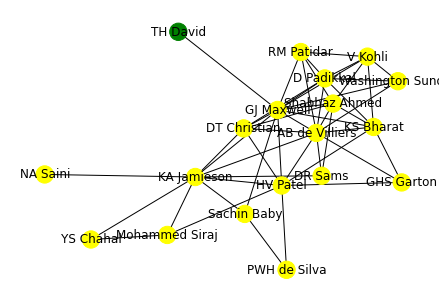

In [61]:
color_map = []
for node in G_UnDirected:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('green') 

nx.draw(G_UnDirected, node_color=color_map, with_labels=True)
plt.savefig(f"Graphs/{team_name}/{team_name}_Community.png", format="PNG")
plt.show()

# Clustering 

In [62]:
import networkx as nx

# returns a Dictionary with clustering value of each node
print(nx.clustering(G_UnDirected))
 
# This returns clustering value of specified node
print("\nGJ Maxwell:",nx.clustering(G_UnDirected, 'GJ Maxwell'))

{'Washington Sundar': 0.8333333333333334, 'V Kohli': 0.6666666666666666, 'RM Patidar': 0.8, 'GJ Maxwell': 0.3787878787878788, 'AB de Villiers': 0.41818181818181815, 'Shabhaz Ahmed': 0.5238095238095238, 'DT Christian': 0.6666666666666666, 'KA Jamieson': 0.2777777777777778, 'HV Patel': 0.39285714285714285, 'Mohammed Siraj': 0.6666666666666666, 'D Padikkal': 0.6190476190476191, 'NA Saini': 0, 'YS Chahal': 1.0, 'DR Sams': 0.6666666666666666, 'KS Bharat': 0.5714285714285714, 'Sachin Baby': 0.3333333333333333, 'PWH de Silva': 0, 'TH David': 0, 'GHS Garton': 1.0}

GJ Maxwell: 0.3787878787878788


# Graph connectivity measures

In [63]:
print(nx.is_connected(G_UnDirected))
 
# returns number of different connected components
print(nx.number_connected_components(G_UnDirected))
 
# returns list of nodes in different connected components
print(list(nx.connected_components(G_UnDirected)))
 
# returns list of nodes of component containing given node
print(nx.node_connected_component(G_UnDirected, 'GJ Maxwell'))
 
# returns number of nodes to be removed so that Graph becomes disconnected
print(nx.node_connectivity(G_UnDirected))
 
# returns number of edges to be removed so that Graph becomes disconnected
print(nx.edge_connectivity(G_UnDirected))

True
1
[{'GJ Maxwell', 'YS Chahal', 'KS Bharat', 'V Kohli', 'PWH de Silva', 'DR Sams', 'TH David', 'HV Patel', 'Sachin Baby', 'KA Jamieson', 'D Padikkal', 'GHS Garton', 'DT Christian', 'Mohammed Siraj', 'Washington Sundar', 'Shabhaz Ahmed', 'NA Saini', 'AB de Villiers', 'RM Patidar'}]
{'GJ Maxwell', 'YS Chahal', 'KS Bharat', 'V Kohli', 'PWH de Silva', 'DR Sams', 'TH David', 'HV Patel', 'Sachin Baby', 'KA Jamieson', 'D Padikkal', 'GHS Garton', 'DT Christian', 'Mohammed Siraj', 'Washington Sundar', 'Shabhaz Ahmed', 'NA Saini', 'AB de Villiers', 'RM Patidar'}
1
1


# Modularity of the graph

In [64]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G_UnDirected, node_groups))
print(nx_comm.modularity(G_UnDirected, nx_comm.label_propagation_communities(G_UnDirected)))

-0.0002000000000001
0.0


In [65]:
final_compare_df['Modularity']= nx_comm.modularity(G_UnDirected, node_groups)


In [66]:
# !pip install --upgrade scipy networkx

# Pagerank

In [67]:
import networkx as nx
pr1 = nx.pagerank(G_UnDirected, 1) # component of vector x = 1
pr2 = nx.pagerank(G_UnDirected, 0.5)  # component of vector x = 0.5
# print(pr1)
s1="Node " +str(max(pr1))+" = "+ str(pr1[max(pr1)])
print(s1)
s2="Node " +str(max(pr2))+" = "+ str(pr2[max(pr2)])
# print(pr2)
print(s2)


Node YS Chahal = 0.020002212464673416
Node YS Chahal = 0.03884289133408733


In [68]:
final_compare_df['Page Rank(x=1)']=s1
final_compare_df['Page Rank(x=0.5)']=s2
print(final_compare_df.T)

                                                        0
Min_degree_name                                  NA Saini
Min_degree                                              1
Max_degree_name                                GJ Maxwell
Max_degree                                             12
Min_Indegree_name                    Washington Sundar: 0
Max_Indegree_name                           GJ Maxwell: 8
Min_Outdegree_name                           YS Chahal: 0
Max_Outdegree_name                      AB de Villiers: 5
Density                                          0.146199
Diameter                                                3
Modularity                                        -0.0002
Page Rank(x=1)      Node YS Chahal = 0.020002212464673416
Page Rank(x=0.5)     Node YS Chahal = 0.03884289133408733


In [69]:

final_compare_df.to_csv(f"Graphs/{team_name}/{team_name}.csv")